In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/raw/loan_default.csv')

# First look
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nTarget Distribution:")
print(df['Default'].value_counts())
print("\nDefault Rate:", df['Default'].value_counts(normalize=True)[1])
print("\nFirst 5 rows:")
print(df.head())

Shape: (255347, 18)

Columns: ['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default']

Data Types:
 LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

Missing Values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Ed

/var/folders/2f/czrxh5x11x31pyqwcsdn1t9w0000gn/T/ipykernel_91977/393429711.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=emp_default, x='EmploymentType', y='Default',
/var/folders/2f/czrxh5x11x31pyqwcsdn1t9w0000gn/T/ipykernel_91977/393429711.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=purpose_default, x='LoanPurpose', y='Default',


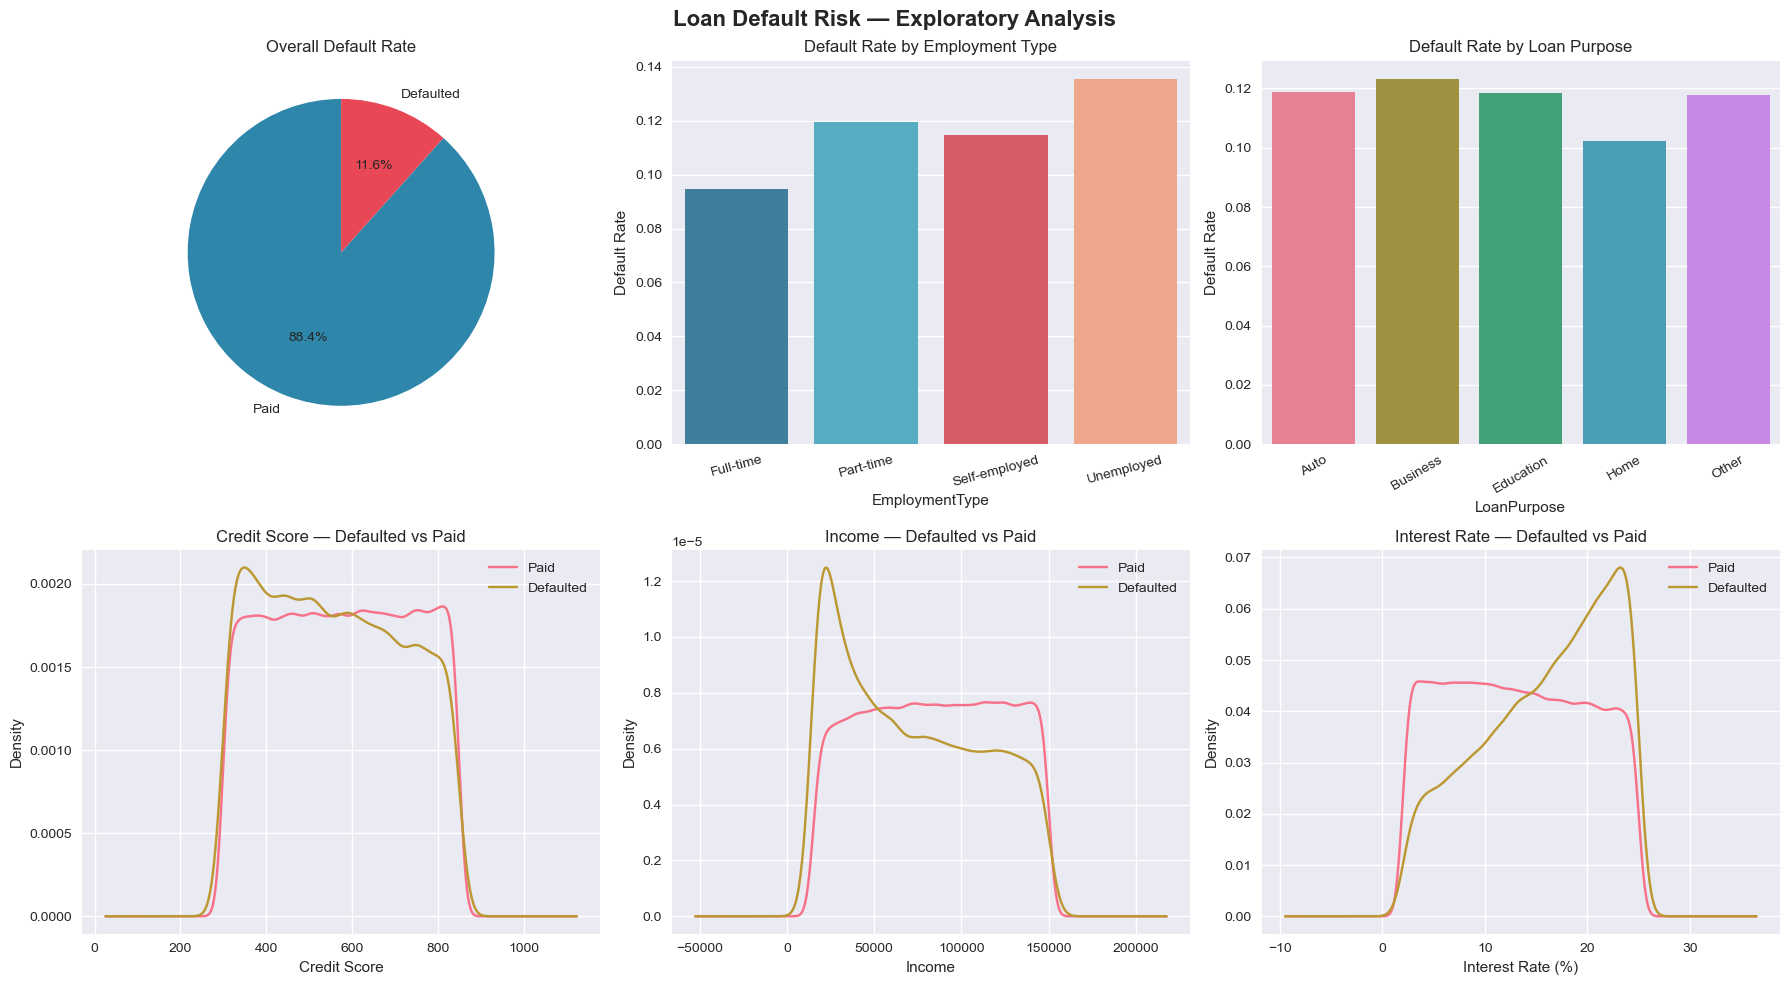

Plot saved.


In [2]:
# ---- EXPLORATORY ANALYSIS ----
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Loan Default Risk — Exploratory Analysis', 
             fontsize=16, fontweight='bold')

# Plot 1: Default Distribution
axes[0,0].pie([225694, 29653], labels=['Paid', 'Defaulted'],
              autopct='%1.1f%%', colors=['#2E86AB','#E84855'],
              startangle=90)
axes[0,0].set_title('Overall Default Rate')

# Plot 2: Default by Employment Type
emp_default = df.groupby('EmploymentType')['Default'].mean().reset_index()
sns.barplot(data=emp_default, x='EmploymentType', y='Default', 
            ax=axes[0,1], palette=['#2E86AB','#45B7D1','#E84855','#FFA07A'])
axes[0,1].set_title('Default Rate by Employment Type')
axes[0,1].set_ylabel('Default Rate')
axes[0,1].tick_params(axis='x', rotation=15)

# Plot 3: Default by Loan Purpose
purpose_default = df.groupby('LoanPurpose')['Default'].mean().reset_index()
sns.barplot(data=purpose_default, x='LoanPurpose', y='Default',
            ax=axes[0,2], palette='husl')
axes[0,2].set_title('Default Rate by Loan Purpose')
axes[0,2].set_ylabel('Default Rate')
axes[0,2].tick_params(axis='x', rotation=30)

# Plot 4: Credit Score Distribution
df.groupby('Default')['CreditScore'].plot(kind='kde', ax=axes[1,0])
axes[1,0].set_title('Credit Score — Defaulted vs Paid')
axes[1,0].set_xlabel('Credit Score')
axes[1,0].legend(['Paid','Defaulted'])

# Plot 5: Income Distribution
df.groupby('Default')['Income'].plot(kind='kde', ax=axes[1,1])
axes[1,1].set_title('Income — Defaulted vs Paid')
axes[1,1].set_xlabel('Income')
axes[1,1].legend(['Paid','Defaulted'])

# Plot 6: Interest Rate Distribution
df.groupby('Default')['InterestRate'].plot(kind='kde', ax=axes[1,2])
axes[1,2].set_title('Interest Rate — Defaulted vs Paid')
axes[1,2].set_xlabel('Interest Rate (%)')
axes[1,2].legend(['Paid','Defaulted'])

plt.tight_layout()
plt.savefig('../visuals/01_EDA_overview.png', dpi=150, bbox_inches='tight')
plt.show()
print("Plot saved.")

Top correlations with Default:
Age                         -0.167783
InterestRate                 0.131273
Income                      -0.099119
MonthsEmployed              -0.097374
LoanAmount                   0.086659
HasCoSigner                 -0.039109
EmploymentType_Unemployed    0.034957
HasDependents               -0.034678
CreditScore                 -0.034166
NumCreditLines               0.028330
MaritalStatus_Married       -0.026875
HasMortgage                 -0.022856
Name: Default, dtype: float64


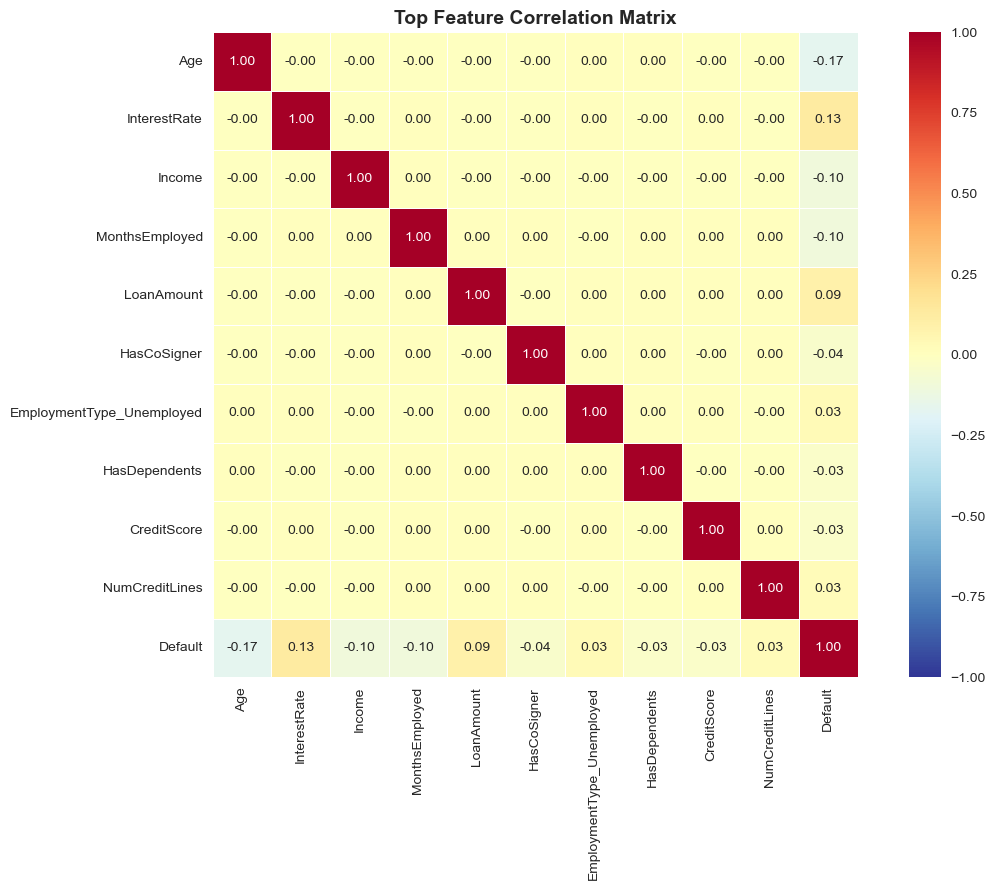


Correlation matrix saved.


In [3]:
# ---- CORRELATION ANALYSIS ----
df_corr = df.copy()

# Encode binary columns
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in binary_cols:
    df_corr[col] = (df_corr[col] == 'Yes').astype(int)

# One hot encode categoricals
df_corr = pd.get_dummies(df_corr, 
                          columns=['Education', 'EmploymentType', 
                                   'MaritalStatus', 'LoanPurpose'],
                          drop_first=True)

# Drop LoanID
df_corr = df_corr.drop('LoanID', axis=1)

# Correlation with Default
corr = df_corr.corr()['Default'].drop('Default').sort_values(key=abs, ascending=False)
print("Top correlations with Default:")
print(corr.head(12))

# Heatmap of top features
top_features = corr.head(10).index.tolist() + ['Default']
plt.figure(figsize=(12, 9))
sns.heatmap(df_corr[top_features].corr(),
            annot=True, fmt='.2f', cmap='RdYlBu_r',
            center=0, vmin=-1, vmax=1,
            square=True, linewidths=0.5)
plt.title('Top Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../visuals/02_correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nCorrelation matrix saved.")